In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data = pd.read_csv("Salary_dataset.csv")

In [136]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [137]:
data.shape

(30, 3)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [139]:
data.duplicated().sum()

np.int64(0)

In [140]:
data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [141]:
data = data[['YearsExperience', 'Salary']]

In [142]:
data_corr = data.corr()

<Axes: >

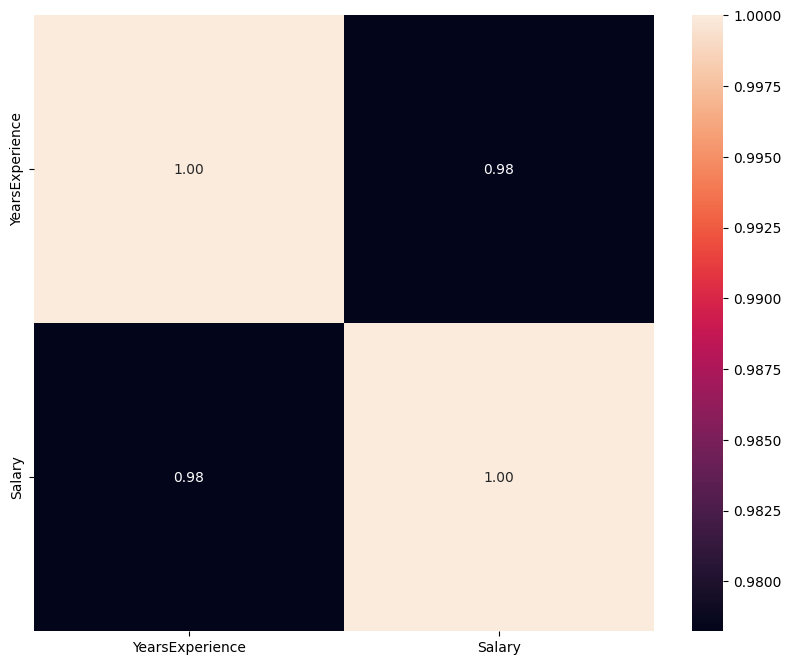

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(data_corr,annot=True, fmt=".2f")

<Axes: xlabel='YearsExperience'>

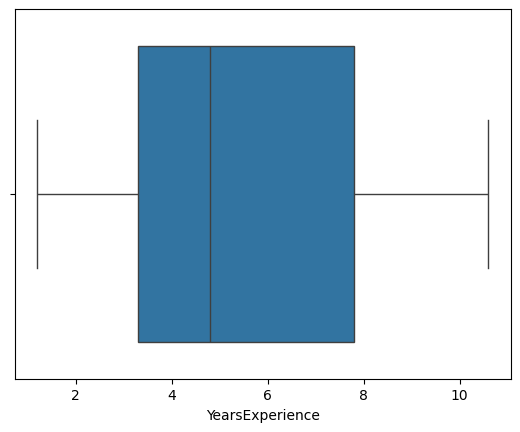

In [144]:
sns.boxplot(data, x=data.YearsExperience)

In [145]:
x = data.YearsExperience.values.reshape(-1,1)
y = data.Salary

In [146]:
from scipy.stats import skew
y_skew = skew(y)
y_skew

np.float64(0.3361618825592921)

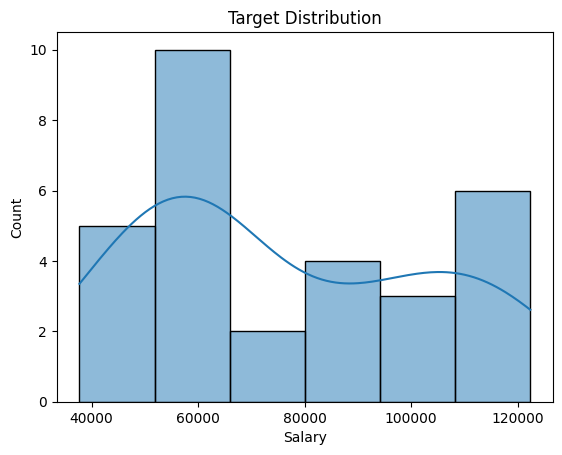

In [147]:
sns.histplot(y, kde=True)
plt.title("Target Distribution")
plt.show()

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, shuffle=True, random_state=1)

In [149]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [150]:
lr.fit(x_train, y_train)

LinearRegression()

In [151]:
preds = lr.predict(x_test)

In [152]:
range_mse = np.max(y)-np.min(y)
mae = mean_absolute_error(y_test,preds)
mae/range_mse

np.float64(0.061605879077639585)

In [153]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R2 Score: 0.92
Mean Squared Error: 40884620.50
Mean Absolute Error: 5215.55


In [157]:
import pickle

pickle.dump(lr,open(r"C:\Users\sevug\Desktop\New folder\bigdatahandson\salary_prediction\Testing\salary_prediction.pkl",'wb'))